# Proof of Concept for loading and plotting data

In [62]:
import matplotlib.pyplot as plt; plt.style.use('seaborn-v0_8')
import numpy as np
from dql.utils.datamanager import ConcatDataManager
from scipy.signal import savgol_filter

In [63]:
CDM = ConcatDataManager('baseLR')
summary = CDM.loadSummary()
for k1, v1 in summary.items():
    print(f'{k1}:')
    for k2, v2 in v1.items():
        print(f'\t{k2}: {v2}')

meta:
	runID: baseLR
	numRepetitions: 5
	numEpisodes: 10000
	runs: 5
params:
	explorationStrategy: egreedy
	annealingScheme: {'id': 1, 'startVal': 1.0, 'endVal': 0.01, 'window': 0.8, 'kind': 'exponential'}
	experienceReplay: False
	targetNetwork: False
	replayBufferSize: None
	targetFrequency: None
	alpha: 0.001
	gamma: 0.999
	batchSize: 128
results:
	avgRuntime: 08:02.089 min
	avgReward: 25.861439999999998
	avgActionBias: 0.6328010717398288
	avgLoss: 14.149767971038818


In [64]:
rewards = CDM.loadRewards()
avgRewards = np.mean(rewards, axis=0)

actions = CDM.loadActions()
normAction0 =  (actions / np.sum(actions, axis=2, keepdims=True))[:, :, 0]
actionBiases = np.abs(normAction0 - .5) * 2

losses = CDM.loadLosses()
avgLosses = np.nanmean(losses, axis=0)


In [65]:
def smooth(arr: np.ndarray, window: int = None) -> np.ndarray:
    if window is None:
        window = arr.shape[0] // 10 + 1
    return savgol_filter(arr, window, 3)

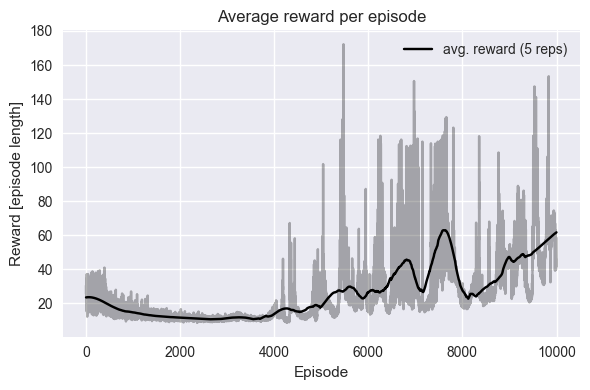

In [66]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(avgRewards, color='k', alpha=0.3)
ax.plot(smooth(avgRewards), color='k', label=f'avg. reward ({summary.meta.numRepetitions} reps)')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward [episode length]')
ax.set_title('Average reward per episode')
ax.legend()
fig.tight_layout();

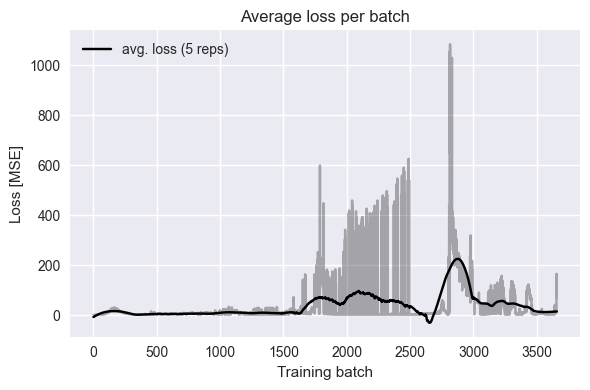

In [67]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(avgLosses, color='k', alpha=0.3)
ax.plot(smooth(avgLosses), color='k', label=f'avg. loss ({summary.meta.numRepetitions} reps)')
ax.set_xlabel('Training batch')
ax.set_ylabel('Loss [MSE]')
ax.set_title('Average loss per batch')
ax.legend()
fig.tight_layout();

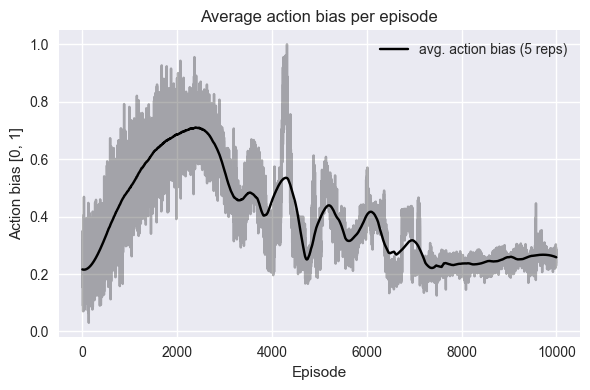

In [68]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.mean(actionBiases, axis=0), color='k', alpha=0.3)
ax.plot(smooth(np.mean(actionBiases, axis=0)), color='k', label=f'avg. action bias ({summary.meta.numRepetitions} reps)')
ax.set_xlabel('Episode')
ax.set_ylabel('Action bias [0, 1]')
ax.set_title('Average action bias per episode')
ax.legend()
fig.tight_layout();